In [88]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [89]:
docs = [
    "el gato duerme en la cama",
    "el perro duerme en el sofá",
    "el gato corre en el jardín"
]

## Algunos aspectos del código 

`vectorizador = CountVectorizer()`: Crea un objeto CountVectorizer de scikit-learn. Se usa para convertir una colección de documentos en una matriz de frecuencias de palabras. Primero tokeniza los textos.

`x = vectorizador.fit_transform(docs)`: fit analiza todos los textos contenidos en docs para aprender el vocabulario; transform convierte los textos en una matriz numérica donde cada fila es un doc, cada columna es una palabra del vocabulario y cada valor indica cuántas veces aparece esa palabra en ese doc.

In [90]:
# Vectorizar el texto
vectorizador = CountVectorizer() 
x = vectorizador.fit_transform(docs)

# Mostrar matriz de frecuencias
tf = pd.DataFrame(x.toarray(), columns = vectorizador.get_feature_names_out()) # Se convierte la matriz dispersa x a una matriz densa de NumPy
print("Frecuencia (Tf) absoluta:")
print(tf)

Frecuencia (Tf) absoluta:
   cama  corre  duerme  el  en  gato  jardín  la  perro  sofá
0     1      0       1   1   1     1       0   1      0     0
1     0      0       1   2   1     0       0   0      1     1
2     0      1       0   2   1     1       1   0      0     0


En esta parte se convierte el texto en números y se calcula el TF-IDF.

- TF: cuántas veces aparece una palabra en un documento.

- IDF: mide qué tan "informativa" es una palabra en todo el conjunto de documentos.

- TF-IDF: da más peso a palabras que son frecuentes en un documento, pero raras en los demás.

In [91]:
# Calcula el TF-iDF de los documentos anteriores, usando tfidfVectorizer
vectorizer = TfidfVectorizer()

# Aprender vocabulario y transformar el texto en vectores
X = vectorizer.fit_transform(docs)

tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf)

       cama     corre    duerme        el        en      gato    jardín  \
0  0.509353  0.000000  0.387376  0.300832  0.300832  0.387376  0.000000   
1  0.000000  0.000000  0.365801  0.568154  0.284077  0.000000  0.000000   
2  0.000000  0.480984  0.000000  0.568154  0.284077  0.365801  0.480984   

         la     perro      sofá  
0  0.509353  0.000000  0.000000  
1  0.000000  0.480984  0.480984  
2  0.000000  0.000000  0.000000  


In [92]:
docs2 = [
    "la inteligencia artificial aprende de los datos",
    "la inteligencia humana razona con lógica",
    "el aprendizaje automático usa datos y modelos"
]

# Calcula el TF-iDF de los documentos anteriores
vectorizer = TfidfVectorizer()

# Aprender vocabulario y transformar el texto en vectores
X = vectorizer.fit_transform(docs2)

df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(df)
    

    aprende  aprendizaje  artificial  automático       con     datos  \
0  0.417567     0.000000    0.417567    0.000000  0.000000  0.317570   
1  0.000000     0.000000    0.000000    0.000000  0.440362  0.000000   
2  0.000000     0.423394    0.000000    0.423394  0.000000  0.322002   

         de        el    humana  inteligencia        la       los    lógica  \
0  0.417567  0.000000  0.000000      0.317570  0.317570  0.417567  0.000000   
1  0.000000  0.000000  0.440362      0.334907  0.334907  0.000000  0.440362   
2  0.000000  0.423394  0.000000      0.000000  0.000000  0.000000  0.000000   

    modelos    razona       usa  
0  0.000000  0.000000  0.000000  
1  0.000000  0.440362  0.000000  
2  0.423394  0.000000  0.423394  


## Importancia global del término o peso promedio/global TF-IDF



In [93]:
tfidf_global = np.sum(X.toarray(), axis=0) # axis = 0 indica que se sume verticalmente (por columnas)

df_tfidf_global = pd.DataFrame({
    'palabra': vectorizer.get_feature_names_out(),
    'tfidf_total': tfidf_global
}).sort_values(by='tfidf_total', ascending=True)

print(df_tfidf_global)


         palabra  tfidf_total
0        aprende     0.417567
2     artificial     0.417567
6             de     0.417567
11           los     0.417567
3     automático     0.423394
7             el     0.423394
13       modelos     0.423394
1    aprendizaje     0.423394
15           usa     0.423394
4            con     0.440362
12        lógica     0.440362
8         humana     0.440362
14        razona     0.440362
5          datos     0.639573
10            la     0.652477
9   inteligencia     0.652477


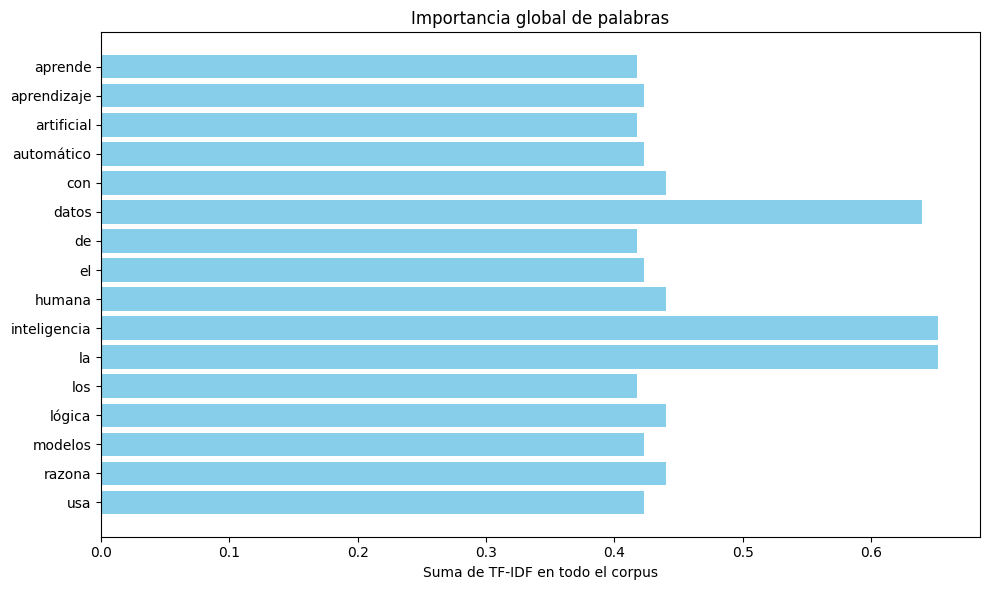

In [94]:
# Crear gráfica de barras horizontal (más legible si hay muchas palabras)
plt.figure(figsize=(10, 6))
plt.barh(vectorizer.get_feature_names_out(), tfidf_global, color='skyblue')
plt.xlabel("Suma de TF-IDF en todo el corpus")
plt.title("Importancia global de palabras")
plt.gca().invert_yaxis()
plt.tight_layout() # Ajusta automáticamente los márgenes y espacios de la figura 
plt.show()

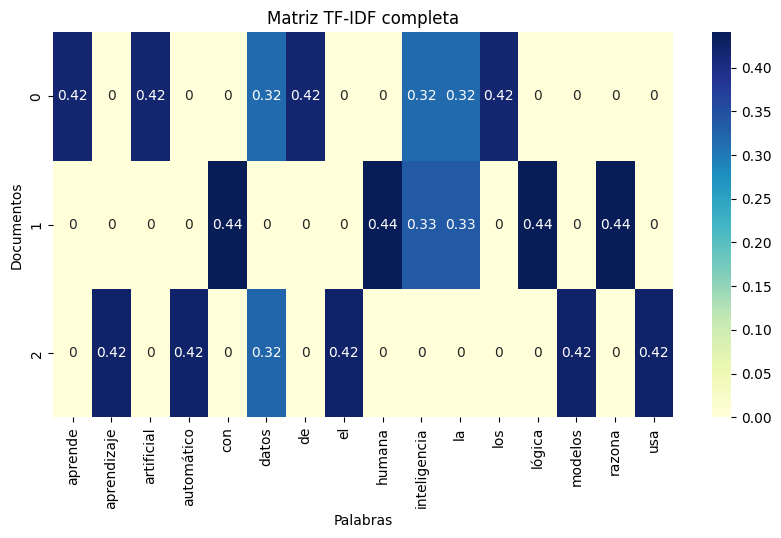

In [95]:
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

plt.figure(figsize=(10, 5))
sns.heatmap(df_tfidf, annot=True, cmap="YlGnBu")
plt.xlabel("Palabras")
plt.ylabel("Documentos")
plt.title("Matriz TF-IDF completa")
plt.show()

In [96]:
# Quitar las stopwords 
import spacy

# Cargar el modelo en español
nlp = spacy.load("es_core_news_sm")

palabras = vectorizer.get_feature_names_out()
print(palabras)

texto = " ".join(palabras)

texto = nlp(texto)
tokens_filtrados = [token.text.lower() for token in texto if not token.is_stop and token.is_alpha] # token.is_alpha solo conserva las palabras formadas únicamente por letras

print(tokens_filtrados)
    

['aprende' 'aprendizaje' 'artificial' 'automático' 'con' 'datos' 'de' 'el'
 'humana' 'inteligencia' 'la' 'los' 'lógica' 'modelos' 'razona' 'usa']
['aprende', 'aprendizaje', 'artificial', 'automático', 'datos', 'humana', 'inteligencia', 'lógica', 'modelos', 'razona']


         palabra  tfidf_total
0        aprende     0.417567
2     artificial     0.417567
3     automático     0.423394
13       modelos     0.423394
1    aprendizaje     0.423394
12        lógica     0.440362
8         humana     0.440362
14        razona     0.440362
5          datos     0.639573
9   inteligencia     0.652477


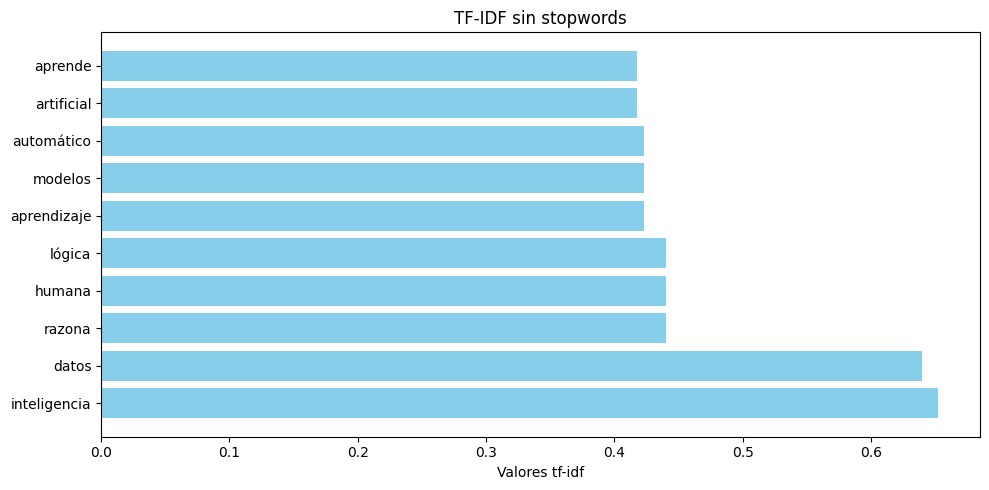

In [104]:
# Filtrar solo las palabras que NO son stopwords
df_tfidf_filtrado = df_tfidf_global[df_tfidf_global['palabra'].isin(tokens_filtrados)]

print(df_tfidf_filtrado)

plt.figure(figsize=(10, 5))
plt.barh(df_tfidf_filtrado["palabra"], df_tfidf_filtrado["tfidf_total"], color='skyblue')
plt.xlabel("Valores tf-idf")
plt.title("TF-IDF sin stopwords")
plt.gca().invert_yaxis()
plt.tight_layout() # Ajusta automáticamente los márgenes y espacios de la figura 
plt.show()